# Problem statement:
    Directing customers to subscribe to product based on through app behaviour Analysis

In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

# EDA

In [2]:
dataset = pd.read_csv('Data/appdata10.csv')

In [3]:
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [4]:
dataset.describe() # we cant find the data here which is represented in string format

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# data Cleaning for hour format
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int) # we have converted our time data in numerical column

In [6]:
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [7]:
# plotting our data

dataset2 =  dataset.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])

In [8]:
dataset2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


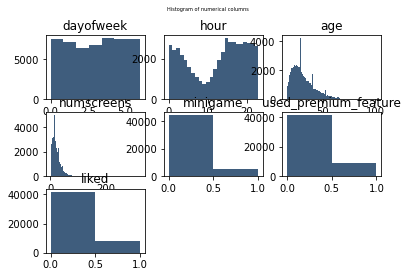

In [9]:
 #plotting histogram so we can get idea about distribution of our data
plt.suptitle('Histogram of numerical columns',fontsize=5)

for i in range(1,dataset2.shape[1] + 1):
    plt.subplot(3,3,i)
    
    f = plt.gca() ## clears the field
    f.set_title(dataset2.columns.values[i-1])
    
    ## setting bins for histogram
    vals = np.size(dataset2.iloc[:,i -1].unique())
    plt.hist(dataset2.iloc[:,i -1],bins=vals,color='#3F5D7D')

In [10]:
# Correlation with Response


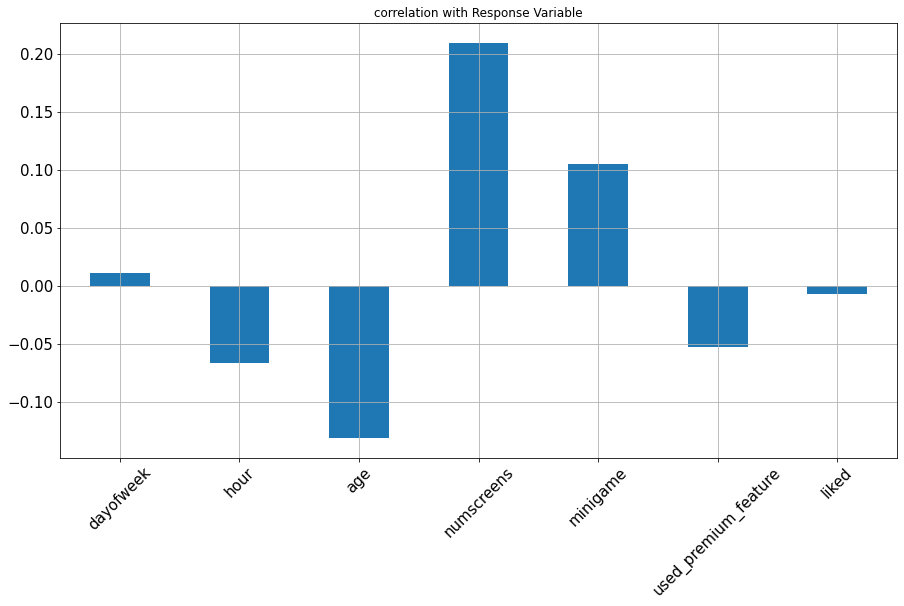

In [11]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (15,8),title='correlation with Response Variable',
                                            fontsize=15, rot=45,grid = True)

In [12]:
## Corelation Matrix

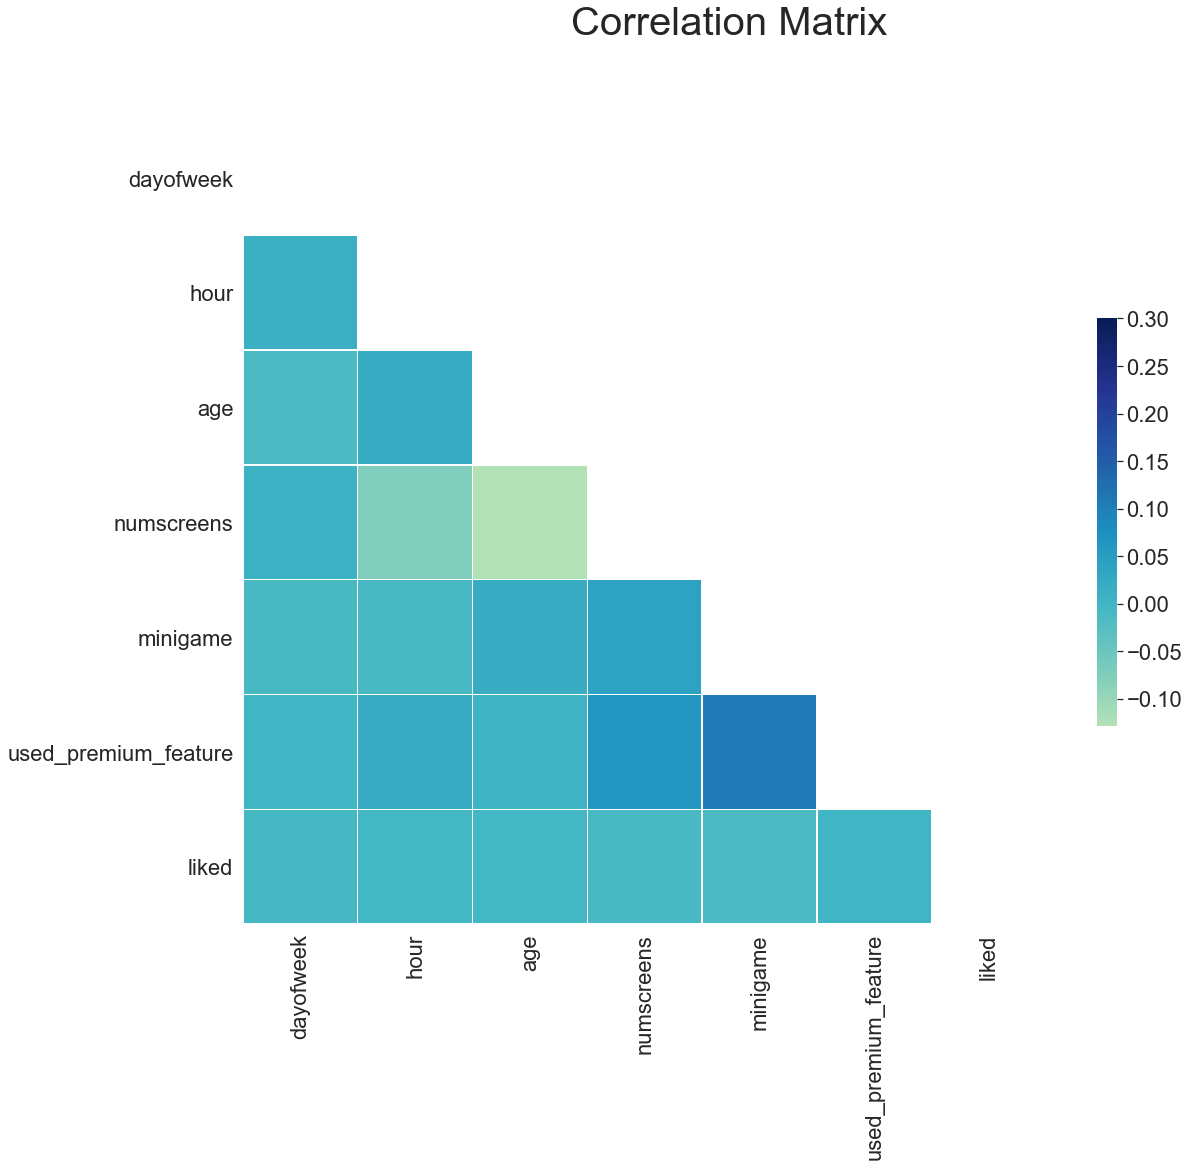

In [13]:
## Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},linecolor='white',cmap="YlGnBu")

# Feature Engineering

In [14]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [15]:
# we need to convert all dates into datetime objects

In [16]:
dataset['first_open']=[parser.parse(row_data) for row_data in dataset['first_open']]

In [18]:
dataset['enrolled_date']=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset['enrolled_date']]

# we are using isinstance for checking if the date is present with str format or not..as there are few null values inn column

In [19]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [20]:
dataset['differnece'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

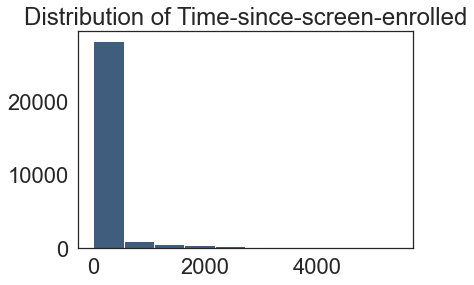

In [23]:
plt.hist(dataset['differnece'].dropna(),color='#3F5D7D' )
plt.title('Distribution of Time-since-screen-enrolled')
plt.show()

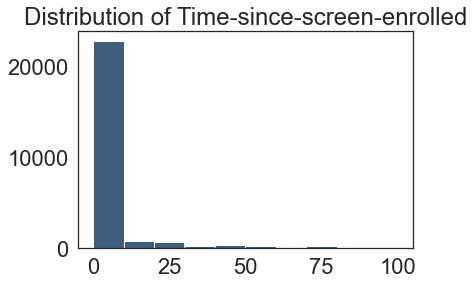

In [24]:
plt.hist(dataset['differnece'].dropna(),color='#3F5D7D',range=[0,100] )
plt.title('Distribution of Time-since-screen-enrolled')
plt.show()

In [26]:
dataset.loc[dataset.differnece > 48,'enrolled']=0

In [30]:
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,differnece
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0.0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0.0


In [31]:
 dataset = dataset.drop(columns=['differnece','enrolled_date','first_open'])

## Formating Screen list Field

In [37]:
top_screens = pd.read_csv('Data/top_screens.csv').top_screens.values

In [38]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [39]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [40]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc + ',','')

In [41]:
 dataset['other'] = dataset.screen_list.str.count(',')

In [42]:
dataset = dataset.drop(columns=['screen_list'])

In [43]:
## Funnels ---> are group in screen that  belong to same set

In [49]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

In [50]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)


In [51]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)


In [52]:

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [54]:
#### Saving Results ####
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,6,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,7,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,11,0,2,0,1


In [55]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,7.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000,5.00000,3.000000,3.000000


In [56]:

dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [57]:
dataset.to_csv('new_appdata10.csv', index = False)

# Building Our Model

In [58]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

In [59]:
dataset = pd.read_csv('new_appdata10.csv')

In [60]:
#preprocessing our data

In [61]:
# Splitting response variable from independent features

In [62]:
response = dataset['enrolled']

In [63]:
dataset = dataset.drop(columns='enrolled')

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [66]:
X_train

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
20330,315793,2,20,32,5,0,1,1,0,0,...,0,0,0,0,0,3,0,0,0,2
17532,103347,1,21,22,42,1,0,0,1,1,...,0,0,0,0,0,14,0,1,0,1
45819,373340,0,4,26,85,1,0,0,0,1,...,0,0,0,0,0,11,0,2,1,2
34807,324006,4,13,25,24,1,0,0,1,0,...,0,0,0,0,0,11,0,0,0,1
31888,248759,3,16,50,11,0,0,0,1,0,...,0,0,0,0,0,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,312924,5,23,19,6,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
45891,291893,0,15,22,4,1,1,0,0,0,...,0,0,0,0,0,2,0,1,0,1
42613,221546,3,6,25,43,0,0,0,0,1,...,0,0,0,0,0,5,6,0,0,0
43567,116320,4,13,27,4,1,0,1,0,0,...,0,0,0,0,0,3,0,0,0,0


In [67]:
train_identifier = X_train['user']

In [68]:
X_train = X_train.drop(columns='user')

In [69]:
test_identifier = X_test['user']

In [70]:
X_test = X_test.drop(columns='user')

# Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc_X = StandardScaler()

In [81]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

In [74]:
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [75]:
X_train2.columns = X_train.columns.values

In [76]:
X_test2.columns = X_test.columns.values

In [77]:
X_train2.index = X_train.index.values

In [78]:
X_test2.index = X_test.index.values

In [79]:
X_train = X_train2

In [80]:
X_test = X_test2

# Building Our Model

In [82]:
from sklearn.linear_model import LogisticRegression

In [98]:
classifier = LogisticRegression(random_state = 0)

In [99]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [100]:
y_pred = classifier.predict(X_test)

In [101]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [102]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [103]:
cm = confusion_matrix(y_test,y_pred)

In [104]:
cm

array([[3885, 1187],
       [1133, 3795]], dtype=int64)

In [105]:
accuracy_score(y_test,y_pred)

0.768

In [106]:
precision_score(y_test,y_pred)

0.7617422721798475

In [107]:
recall_score(y_test,y_pred)

0.7700892857142857

In [108]:
f1_score(y_test,y_pred)

0.7658930373360243

Test Data Accuracy: 0.7680


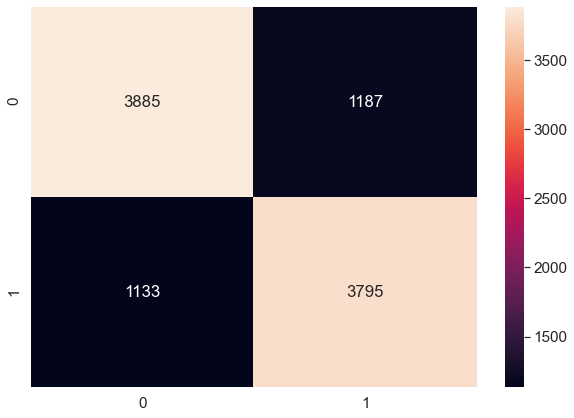

In [109]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [110]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.767 (+/- 0.009)


In [112]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.032715
1,hour,-0.003747
2,age,-0.149793
3,numscreens,-0.131250
4,minigame,-0.026619
5,used_premium_feature,-0.066105
6,liked,0.010852
7,location,-0.028831
8,Institutions,-0.062297
9,VerifyPhone,0.650615


# Model Tuning ####

In [113]:

## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

In [114]:
# Select Regularization Method
penalty = ['l1', 'l2']

In [115]:
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [116]:

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

In [117]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)


In [118]:
t0 = time.time()

In [119]:
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 14.66 seconds


In [120]:

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.7673249999999999, {'C': 0.01, 'penalty': 'l2'})

# Grid Search (Round 2)

In [121]:
# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_



Took 4.36 seconds


0.767225

In [125]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test,test_identifier], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
